## Import relevant libraries

In [1]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import datetime
from datetime import date, timedelta

## Time frame for data set

In [2]:
start_date = "2022-01-1"
end_date = "2024-02-29"

## Data frame

In [3]:
data = yf.download('TSLA', start=start_date, end=end_date, progress=False)
print(data.head())

                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2022-01-03  382.583344  400.356659  378.679993  399.926666  399.926666   
2022-01-04  396.516663  402.666656  374.350006  383.196655  383.196655   
2022-01-05  382.216675  390.113342  360.336670  362.706665  362.706665   
2022-01-06  359.000000  362.666656  340.166656  354.899994  354.899994   
2022-01-07  360.123322  360.309998  336.666656  342.320007  342.320007   

               Volume  
Date                   
2022-01-03  103931400  
2022-01-04  100248300  
2022-01-05   80119800  
2022-01-06   90336600  
2022-01-07   84164700  


In [4]:
print(data.tail())

                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2024-02-22  194.000000  198.320007  191.360001  197.410004  197.410004   
2024-02-23  195.309998  197.570007  191.500000  191.970001  191.970001   
2024-02-26  192.289993  201.779999  192.000000  199.399994  199.399994   
2024-02-27  204.039993  205.600006  198.259995  199.729996  199.729996   
2024-02-28  200.419998  205.300003  198.440002  202.039993  202.039993   

               Volume  
Date                   
2024-02-22   92739500  
2024-02-23   78841900  
2024-02-26  111747100  
2024-02-27  108645400  
2024-02-28   99806200  


In [5]:
# Reset the index
df = data.reset_index()
print(df.head())

        Date        Open        High         Low       Close   Adj Close  \
0 2022-01-03  382.583344  400.356659  378.679993  399.926666  399.926666   
1 2022-01-04  396.516663  402.666656  374.350006  383.196655  383.196655   
2 2022-01-05  382.216675  390.113342  360.336670  362.706665  362.706665   
3 2022-01-06  359.000000  362.666656  340.166656  354.899994  354.899994   
4 2022-01-07  360.123322  360.309998  336.666656  342.320007  342.320007   

      Volume  
0  103931400  
1  100248300  
2   80119800  
3   90336600  
4   84164700  


In [6]:
# Drop column 
df = df.drop(['Date', 'Adj Close'], axis=1)
df.head()

,Open,High,Low,Close,Volume
0,382.583344,400.356659,378.679993,399.926666,103931400
1,396.516663,402.666656,374.350006,383.196655,100248300
2,382.216675,390.113342,360.336670,362.706665,80119800
3,359.000000,362.666656,340.166656,354.899994,90336600
4,360.123322,360.309998,336.666656,342.320007,84164700


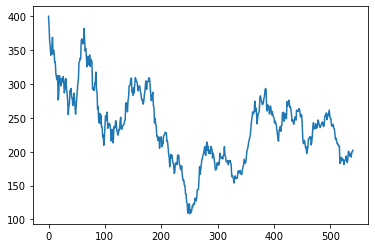

In [7]:
# Price of TSLA during the parameter
plt.plot(df.Close)

In [8]:
df

,Open,High,Low,Close,Volume
0,382.583344,400.356659,378.679993,399.926666,103931400
1,396.516663,402.666656,374.350006,383.196655,100248300
2,382.216675,390.113342,360.336670,362.706665,80119800
3,359.000000,362.666656,340.166656,354.899994,90336600
4,360.123322,360.309998,336.666656,342.320007,84164700
...,...,...,...,...,...
536,194.000000,198.320007,191.360001,197.410004,92739500
537,195.309998,197.570007,191.500000,191.970001,78841900
538,192.289993,201.779999,192.000000,199.399994,111747100
539,204.039993,205.600006,198.259995,199.729996,108645400


### Moving Avg for 100 days

In [9]:
# Moving Avg
ma100 = df.Close.rolling(100).mean()
ma100

0           NaN
1           NaN
2           NaN
3           NaN
4           NaN
         ...   
536    226.2218
537    225.6393
538    225.1173
539    224.6493
540    224.0581
Name: Close, Length: 541, dtype: float64

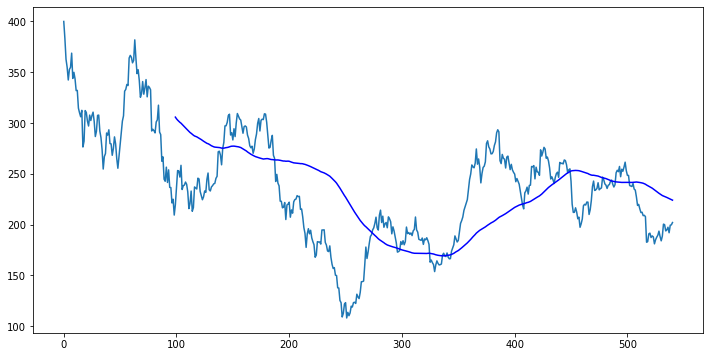

In [10]:
# Size of the graph
plt.figure(figsize = (12,6))

# Graph will display the information in the colum selected in this case 'Close'
plt.plot(df.Close)
plt.plot(ma100, 'b')

### Moving Avg for 200 days

In [11]:
# Moving Avg
ma200 = df.Close.rolling(200).mean()
ma200

0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
         ...    
536    233.88280
537    233.98370
538    234.13495
539    234.29090
540    234.44070
Name: Close, Length: 541, dtype: float64

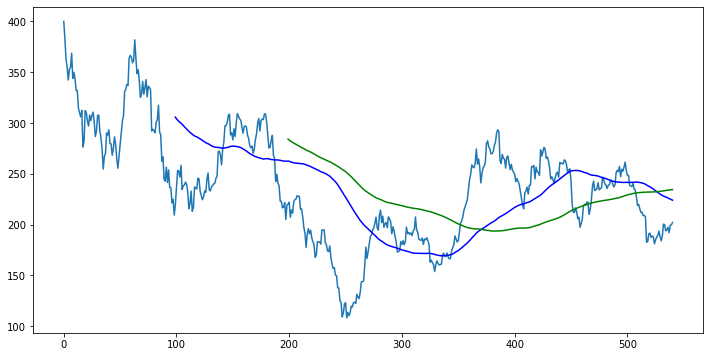

In [12]:
# Size of the graph
plt.figure(figsize = (12,6))

# Graph will display the information in the colum selected in this case 'Close'
plt.plot(df.Close)
plt.plot(ma100, 'b')

# Adding the MA 200
plt.plot(ma200, 'g')

In [13]:
# Shape of the data
df.shape

(541, 5)

## Split data into Training & Testing

In [14]:
data_training = pd.DataFrame(df['Close'][0:int(len(df)*0.70)]) ## 0.70 will represent 70% is training data
data_testing = pd.DataFrame(df['Close'][int(len(df)*0.70):int(len(df))])

# Shape of the data
print(data_training.shape)
print(data_testing.shape)

(378, 1)
(163, 1)


In [15]:
data_training.head()

,Close
0,399.926666
1,383.196655
2,362.706665
3,354.899994
4,342.320007


In [16]:
data_testing.head()

,Close
378,274.429993
379,269.609985
380,269.790009
381,271.989990
382,277.899994


## Scaling Data

In [17]:
from sklearn.preprocessing import MinMaxScaler

C:\Users\serch\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [18]:
scaler = MinMaxScaler(feature_range=(0,1))

In [19]:
data_training_array = scaler.fit_transform(data_training)
data_training_array

array([[1.        ],
       [0.94267141],
       [0.87245853],
       [0.84570748],
       [0.80259974],
       [0.83819162],
       [0.84536479],
       [0.89313288],
       [0.80785398],
       [0.82847122],
       [0.80665461],
       [0.76683647],
       [0.76754465],
       [0.70772604],
       [0.69184905],
       [0.67859916],
       [0.70031298],
       [0.57659799],
       [0.59630147],
       [0.6995248 ],
       [0.6932768 ],
       [0.66404712],
       [0.64746195],
       [0.68421899],
       [0.66596606],
       [0.68271124],
       [0.69413347],
       [0.66277926],
       [0.61189287],
       [0.62989451],
       [0.68320232],
       [0.68429888],
       [0.63056838],
       [0.60844338],
       [0.56795126],
       [0.50228444],
       [0.54423861],
       [0.55463288],
       [0.6238064 ],
       [0.61688441],
       [0.63461185],
       [0.58823732],
       [0.58709506],
       [0.54859048],
       [0.57122946],
       [0.61071641],
       [0.58710646],
       [0.538

In [20]:
# Divide data into x and y train
x_train = []
y_train = []

In [21]:
data_training_array.shape

(378, 1)

In [22]:
# instertio o values to the parameters
for i in range(100, data_training_array.shape[0]):
    
    # Insert values into the x_train startinf from 0 to i
    x_train.append(data_training_array[i-100:i])
    
    # Insert values into the x_train startinf from i to 0
    y_train.append(data_training_array[i,0])

# Convert it into np array
x_train , y_train = np.array(x_train), np.array(y_train)

In [28]:
# Shape of the x_train
x_train.shape

(278, 100, 1)

## Machine Laerning Model

In [24]:
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

### Creating the Model

In [30]:
# model seuqential
model = Sequential()

# First Layer
# List
model.add(LSTM(units = 50, activation = 'relu', return_sequences = True, input_shape = (x_train.shape[1],1)))

# Add dropot
model.add(Dropout(0.2))



# Second Layer
# List
model.add(LSTM(units = 60, activation = 'relu', return_sequences = True))

# Add dropot
model.add(Dropout(0.3))



# Third Layer
# List
model.add(LSTM(units = 80, activation = 'relu', return_sequences = True))

# Add dropot
model.add(Dropout(0.4))



# Fourth Layer
# List
model.add(LSTM(units = 120, activation = 'relu'))

# Add dropot
model.add(Dropout(0.5))

# Add all the layers
model.add(Dense(units=1))

In [31]:
# Sumary of the model
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 100, 50)           10400     
                                                                 
 dropout (Dropout)           (None, 100, 50)           0         
                                                                 
 lstm_3 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_1 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_4 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_2 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_5 (LSTM)               (None, 120)              

In [32]:
# Compile model
model.compile(optimizer='adam', loss = 'mean_squared_error')

# Fit data
model.fit(x_train, y_train, epochs=50)


Epoch 1/50

9/9 [==============================] - 8s 157ms/step - loss: 0.1069
Epoch 2/50
9/9 [==============================] - 1s 155ms/step - loss: 0.0277
Epoch 3/50
9/9 [==============================] - 1s 162ms/step - loss: 0.0259
Epoch 4/50
9/9 [==============================] - 1s 150ms/step - loss: 0.0204
Epoch 5/50
9/9 [==============================] - 1s 146ms/step - loss: 0.0189
Epoch 6/50
9/9 [==============================] - 1s 149ms/step - loss: 0.0175
Epoch 7/50
9/9 [==============================] - 1s 140ms/step - loss: 0.0175
Epoch 8/50
9/9 [==============================] - 1s 145ms/step - loss: 0.0174
Epoch 9/50
9/9 [==============================] - 1s 142ms/step - loss: 0.0157
Epoch 10/50
9/9 [==============================] - 1s 141ms/step - loss: 0.0140
Epoch 11/50
9/9 [==============================] - 1s 145ms/step - loss: 0.0109
Epoch 12/50
9/9 [==============================] - 1s 149ms/step - loss: 0.0123
Epoch 13/50
9/9 [==============================

In [33]:
model.save('keras_model.h5')

C:\Users\serch\anaconda3\lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [34]:
data_testing.head()

,Close
378,274.429993
379,269.609985
380,269.790009
381,271.989990
382,277.899994


In [35]:
# Appedn data frames
past_100_days = data_training.tail(100)

In [37]:
# Final data frame
final_df = past_100_days.append(data_testing, ignore_index=True)

In [39]:
final_df.head()

,Close
0,196.889999
1,194.639999
2,209.250000
3,214.240005
4,202.039993


In [41]:
# Scaling down the data
input_data = scaler.fit_transform(final_df)

input_data

array([[0.30904793],
       [0.2929293 ],
       [0.39759296],
       [0.43334055],
       [0.34594165],
       [0.39085894],
       [0.31248654],
       [0.33748837],
       [0.34615666],
       [0.30897633],
       [0.38598758],
       [0.37223303],
       [0.35117133],
       [0.26613651],
       [0.31549534],
       [0.2869833 ],
       [0.24328396],
       [0.2023784 ],
       [0.13733074],
       [0.14105597],
       [0.14850631],
       [0.21140479],
       [0.19127443],
       [0.21763741],
       [0.18898206],
       [0.2113332 ],
       [0.31399099],
       [0.26792747],
       [0.27559282],
       [0.2626263 ],
       [0.27265562],
       [0.25388641],
       [0.28748482],
       [0.29751415],
       [0.38476974],
       [0.29386063],
       [0.27817181],
       [0.22759514],
       [0.22429972],
       [0.22035959],
       [0.23669313],
       [0.19191915],
       [0.23031732],
       [0.22386991],
       [0.23848409],
       [0.21892685],
       [0.19227736],
       [0.066

In [42]:
# Shape of the data
input_data.shape

(263, 1)

In [43]:
x_test = []
y_test = []

for i in range(100, input_data.shape[0]):
    
    # Append data into the new arrays
    x_test.append(input_data[i-100:i])
    y_test.append(input_data[i,0])

In [44]:
# Convert into NumPy array
x_test, y_test = np.array(x_test), np.array(y_test)

print(x_test.shape)
print(y_test.shape)

(163, 100, 1)
(163,)


## Making Predictions

In [45]:
y_predicted = model.predict(x_test)

6/6 [==============================] - 1s 50ms/step


In [46]:
y_predicted.shape

(163, 1)

In [47]:
y_test

array([0.86453181, 0.83000207, 0.83129172, 0.84705203, 0.88939034,
       0.91432057, 0.9787951 , 1.        , 0.98509931, 0.78193278,
       0.76130089, 0.82606204, 0.79898275, 0.79232043, 0.73042488,
       0.80729282, 0.81438495, 0.76882305, 0.7189627 , 0.75628634,
       0.71717174, 0.69990687, 0.68737015, 0.63356977, 0.65613582,
       0.63686508, 0.61616159, 0.56744759, 0.51472174, 0.46901643,
       0.44229534, 0.55541228, 0.56909524, 0.59538651, 0.54652909,
       0.60777992, 0.60942768, 0.74095562, 0.73894976, 0.74740303,
       0.65377174, 0.73601256, 0.70327388, 0.70019348, 0.67877357,
       0.85844251, 0.81474328, 0.84210897, 0.8760657 , 0.86424542,
       0.79898275, 0.80772264, 0.77971201, 0.73035317, 0.65284051,
       0.66795621, 0.64739593, 0.62146287, 0.66358627, 0.69109538,
       0.70098151, 0.6646608 , 0.76946777, 0.7615158 , 0.76495452,
       0.75879373, 0.78709075, 0.7825775 , 0.75306253, 0.69754279,
       0.71760155, 0.72426398, 0.63707998, 0.47539224, 0.41722

In [48]:
y_predicted

array([[0.6578644 ],
       [0.6668102 ],
       [0.6768956 ],
       [0.68571454],
       [0.69219345],
       [0.6968808 ],
       [0.70087767],
       [0.7060215 ],
       [0.7134817 ],
       [0.7229463 ],
       [0.72905916],
       [0.72839504],
       [0.72155035],
       [0.70993334],
       [0.69543135],
       [0.67889386],
       [0.6627069 ],
       [0.6488341 ],
       [0.63762665],
       [0.62815756],
       [0.62040997],
       [0.6137542 ],
       [0.6075613 ],
       [0.60139483],
       [0.5943117 ],
       [0.58646727],
       [0.5780989 ],
       [0.569363  ],
       [0.55982304],
       [0.54867935],
       [0.53527415],
       [0.5193462 ],
       [0.5031367 ],
       [0.48910537],
       [0.47932836],
       [0.47405198],
       [0.47367638],
       [0.4779606 ],
       [0.4879395 ],
       [0.50370485],
       [0.52440864],
       [0.5466235 ],
       [0.56864464],
       [0.5885278 ],
       [0.6048731 ],
       [0.61660147],
       [0.6265646 ],
       [0.636

In [49]:
# Scale up the values
scaler.scale_

array([0.00716384])

In [51]:
# Divide y_predictor and y_test
scale_factor = 1/0.00716384

y_predicted = y_predicted * scale_factor

y_test = y_test * scale_factor

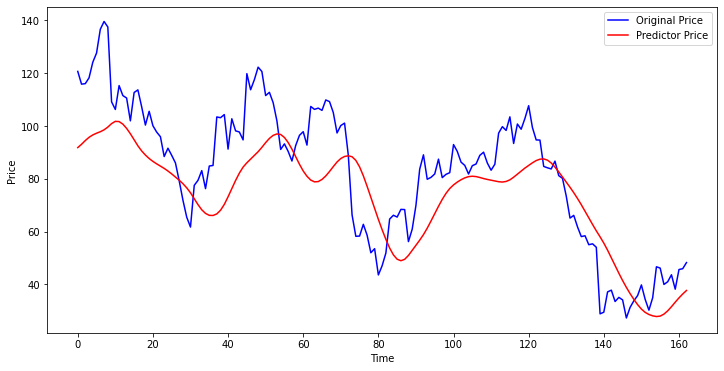

In [54]:
# Create graph

# Graph size
plt.figure(figsize=(12,6))

# Parameters
plt.plot(y_test, 'b', label = 'Original Price')

# Y predictor
plt.plot(y_predicted, 'r', label = 'Predictor Price')

plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()